In [1]:
# Загрузка данных
import pandas as pd
data = pd.read_csv("../2/melbourne_housing.csv")

In [2]:
display(data.dtypes), display(data.head()), display(data.isnull().sum());

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

columns_and_types = {
  "Rooms": np.int64,
  "Type": None,
  "Price": np.int64,
  "Distance": np.float64,
  "Postcode": np.int64,
  "Bedroom2": np.int64,
  "Bathroom": np.int64,
  "Car": np.int64,
  "Landsize": np.float64,
  "BuildingArea": np.float64,
  "YearBuilt": np.int64,
  "Lattitude": np.float64,
  "Longtitude": np.float64,
  "Propertycount": np.int64,
}

data = data[list(columns_and_types.keys())]
data.dropna(axis=0, how='any', inplace=True)
data = data.astype({k: v for k,v in columns_and_types.items() if v is not None})

type_encoder = LabelEncoder()
data["Type"] = type_encoder.fit_transform(data["Type"])

In [4]:
display(data.shape), display(data.dtypes)

(8887, 14)

Rooms              int64
Type               int64
Price              int64
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car                int64
Landsize         float64
BuildingArea     float64
YearBuilt          int64
Lattitude        float64
Longtitude       float64
Propertycount      int64
dtype: object

(None, None)

In [5]:
data.head()

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,0,1035000,2.5,3067,2,1,0,156.0,79.0,1900,-37.8079,144.9934,4019
4,3,0,1465000,2.5,3067,3,2,0,134.0,150.0,1900,-37.8093,144.9944,4019
6,4,0,1600000,2.5,3067,3,1,2,120.0,142.0,2014,-37.8072,144.9941,4019
11,3,0,1876000,2.5,3067,4,2,0,245.0,210.0,1910,-37.8024,144.9993,4019
14,2,0,1636000,2.5,3067,2,1,2,256.0,107.0,1890,-37.8060,144.9954,4019


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in data.columns:
  if col != "Price":
    data[col] = scaler.fit_transform(data[[col]])

In [7]:
data.head()

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,-1.140264,-0.556327,1035000,-1.27695,-0.396621,-1.115905,-0.895892,-1.734910,-0.346267,-0.799693,-1.775256,-0.037540,0.016874,-0.790198
4,-0.102631,-0.556327,1465000,-1.27695,-0.396621,-0.080939,0.489973,-1.734910,-0.366997,0.007854,-1.775256,-0.053003,0.025283,-0.790198
6,0.935002,-0.556327,1600000,-1.27695,-0.396621,-0.080939,-0.895892,0.315512,-0.380188,-0.083137,1.302598,-0.029809,0.022761,-0.790198
11,-0.102631,-0.556327,1876000,-1.27695,-0.396621,0.954028,0.489973,-1.734910,-0.262404,0.690288,-1.505269,0.023204,0.066490,-0.790198
14,-1.140264,-0.556327,1636000,-1.27695,-0.396621,-1.115905,-0.895892,0.315512,-0.252039,-0.481224,-2.045243,-0.016556,0.033693,-0.790198


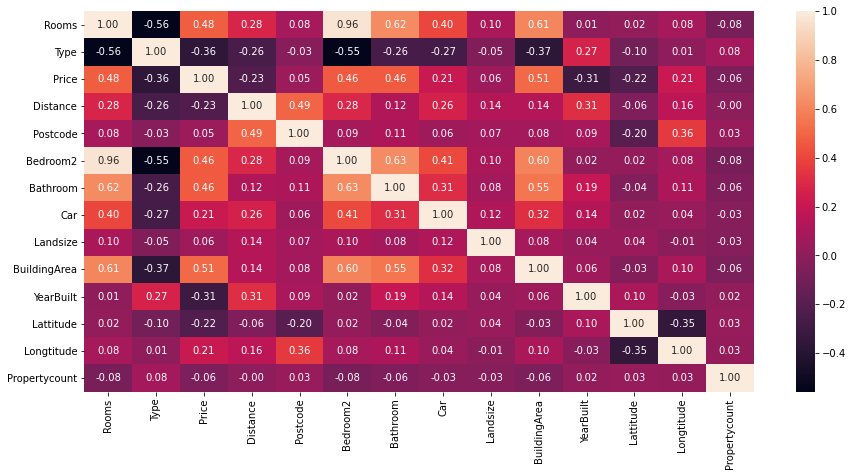

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method="pearson"), ax=ax, annot=True, fmt='.2f');

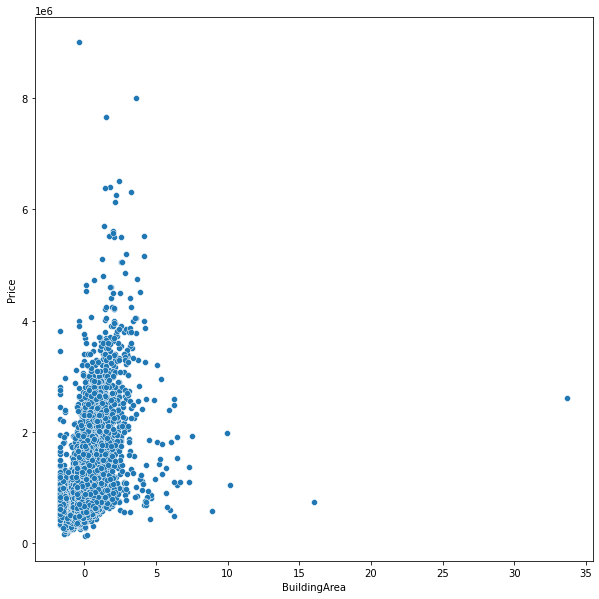

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x="BuildingArea", y="Price", data=data);

# Линейная регрессия

In [10]:
from sklearn.model_selection import train_test_split

data_X = data.loc[:, [x for x in data.columns if x != "Price"]]
data_Y = data.loc[:, 'Price']
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
  data_X,
  data_Y,
  test_size=0.2,
  random_state=1
)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Обучим линейную регрессию и сравним коэффициенты с рассчитанными ранее
reg1 = LinearRegression()
reg1.fit(data_X_train, data_y_train)
y_pred = reg1.predict(data_X_test)
r2_score(data_y_test, y_pred), mean_absolute_percentage_error(data_y_test, y_pred)

(0.6175514371440386, 0.26894243290410874)

# SVR

In [12]:
from sklearn.svm import SVR

svr = SVR(max_iter=10000, kernel="rbf", C=1e6)
svr.fit(data_X_train, data_y_train);

/usr/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [13]:
y_pred = svr.predict(data_X_test)

In [14]:
r2_score(data_y_test, y_pred), mean_absolute_percentage_error(data_y_test, y_pred)

(0.8007830168563735, 0.15056431505942702)

# Деревья решений

In [15]:
# Обучим дерево и предскажем результаты
from sklearn.tree import DecisionTreeRegressor

tree_regr = DecisionTreeRegressor(random_state=1, max_depth=7).fit(data_X_train, data_y_train)
y_test_predict = tree_regr.predict(data_X_test)
y_test_predict.shape

(1778,)

In [16]:
r2_score(data_y_test, y_test_predict)

0.6626220166750287

In [17]:
list(
  zip(
    data_X_train.columns.values,
    tree_regr.feature_importances_
  )
)

[('Rooms', 0.005024582426006323),
 ('Type', 0.01650526758281762),
 ('Distance', 0.16679148277830835),
 ('Postcode', 0.09971740359027761),
 ('Bedroom2', 0.0006393899010610526),
 ('Bathroom', 0.011851644859025727),
 ('Car', 0.0),
 ('Landsize', 0.0506516356530368),
 ('BuildingArea', 0.4239520690926708),
 ('YearBuilt', 0.129300603225875),
 ('Lattitude', 0.06167573602026102),
 ('Longtitude', 0.032645389732301903),
 ('Propertycount', 0.0012447951383578269)]

In [18]:
# Визуализация дерева
from sklearn.tree import export_graphviz
from io import StringIO
import pydot

def get_png_tree(tree_model_param, feature_names_param):
  dot_data = StringIO()
  export_graphviz(
    tree_model_param, out_file=dot_data,
    feature_names=feature_names_param, filled=True,
    rounded=True, special_characters=True
  )
  (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
  return graph.create_png()

In [19]:
tree_regr_depth3 = DecisionTreeRegressor(
  random_state=1,
  max_depth=3
).fit(data_X_train, data_y_train)
tree_regr_depth3

DecisionTreeRegressor(max_depth=3, random_state=1)

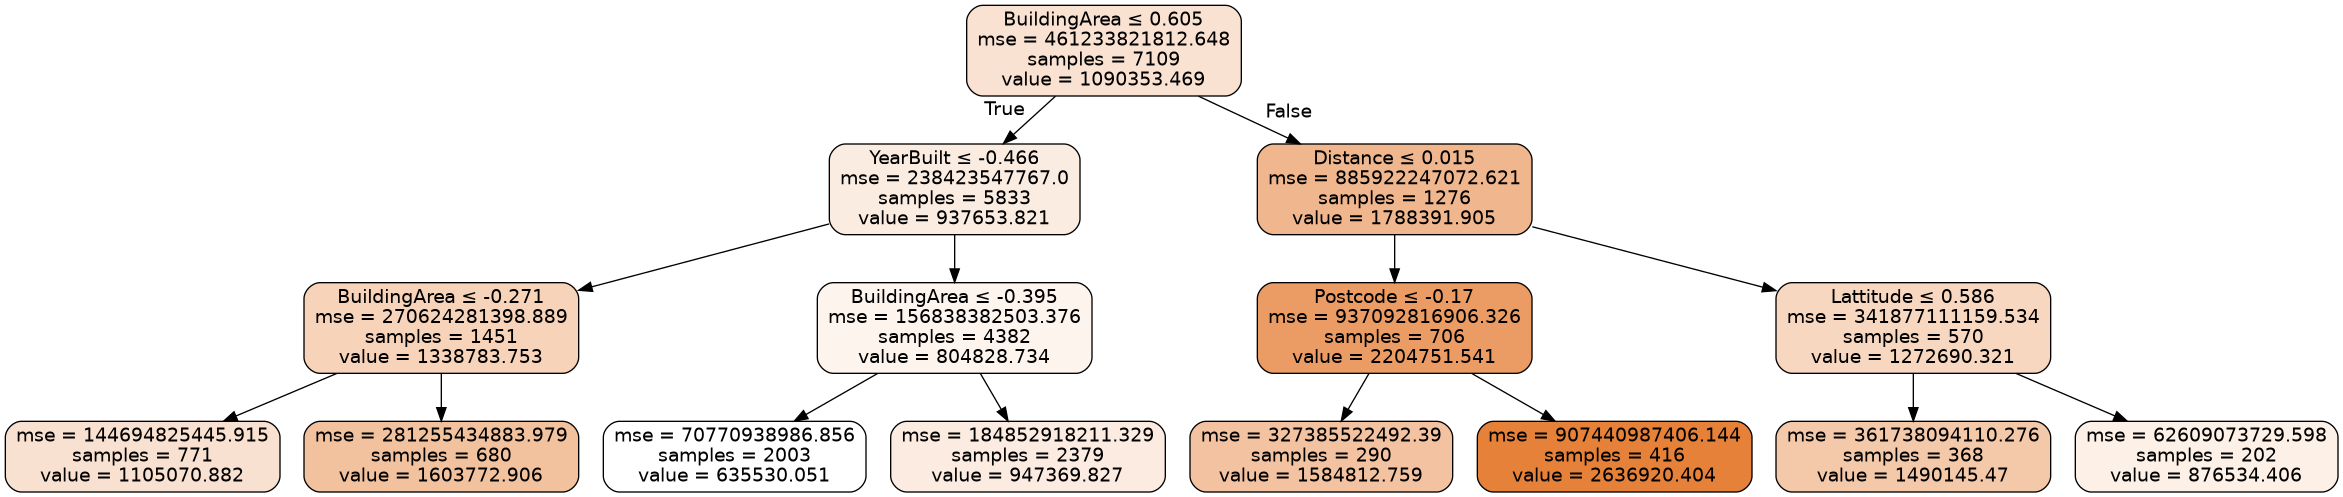

In [20]:
from IPython.display import Image
Image(get_png_tree(tree_regr_depth3, [x for x in data.columns if x != "Price"]))